## Importing Liabraries

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input 
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Conv1D
from sklearn.svm import SVC

## Loading the Data set

In [116]:
Data = pd.read_csv("data_BC.CSV")

## Understanding Data set 

In [117]:
Data.shape

(569, 32)

In [118]:
Data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [119]:
Data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [120]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [121]:
Data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## To check how many categorical field we have 

In [122]:
Data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Data Visualizations

[Text(0.5, 0, 'Tumor Type')]

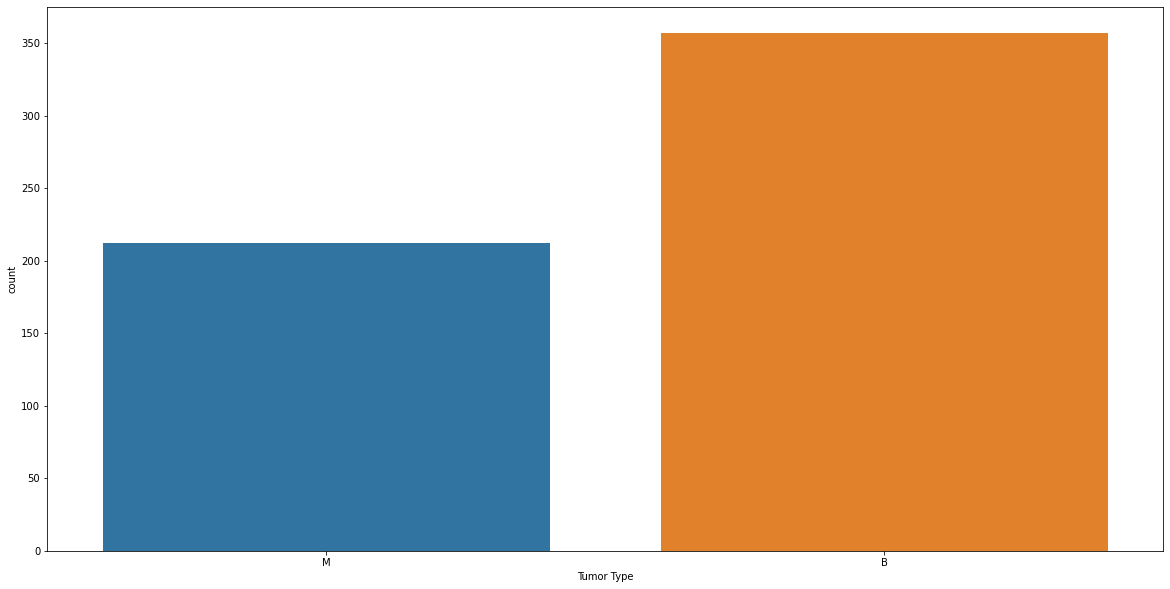

In [123]:
plt.figure(figsize=(20,10))
# plt.hist(Data.diagnosis)
graph=sns.countplot(x='diagnosis',data=Data)
graph.set(xlabel='Tumor Type')

Text(0.5, 0, 'Tumor Type')

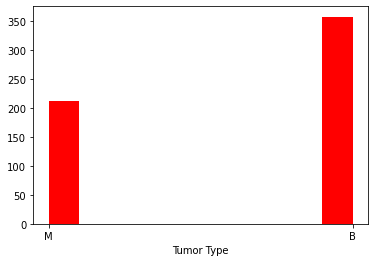

In [124]:
plt.hist(Data.diagnosis,color='red')
plt.xlabel("Tumor Type")

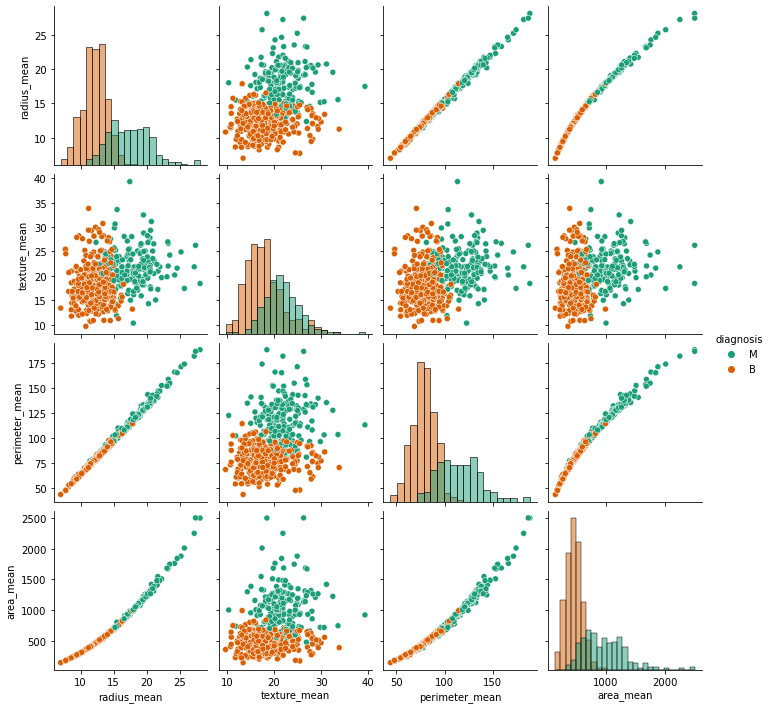

In [125]:
colomns = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(Data[colomns], hue ='diagnosis', kind='scatter',palette='Dark2',diag_kind = 'hist')


plt.show()

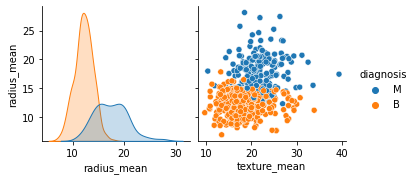

In [126]:
sns.pairplot(Data, hue ='diagnosis', x_vars = ['radius_mean', 'texture_mean'], y_vars =['radius_mean'])


## Convert classification coloumns to numerical values

In [127]:
label= LabelEncoder()
Data.diagnosis = label.fit_transform(Data.diagnosis)

In [128]:
Data.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [129]:
colomn=[ 'radius_mean',  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']

correlation = Data[colomn].corr()

correlation.style.background_gradient(cmap='coolwarm')

,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave points_mean
radius_mean,1.000000,0.997855,0.987357,0.147741,0.506124,0.822529
perimeter_mean,0.997855,1.000000,0.986507,0.183027,0.556936,0.850977
area_mean,0.987357,0.986507,1.000000,0.151293,0.498502,0.823269
symmetry_mean,0.147741,0.183027,0.151293,1.000000,0.602641,0.462497
compactness_mean,0.506124,0.556936,0.498502,0.602641,1.000000,0.831135
concave points_mean,0.822529,0.850977,0.823269,0.462497,0.831135,1.000000


<AxesSubplot:xlabel='radius_mean', ylabel='area_mean'>

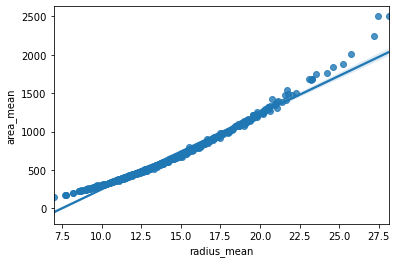

In [130]:

sns.regplot(x=Data["radius_mean"], y=Data['area_mean'])

# Defining Data

In [131]:
target= 'diagnosis'
X = Data[colomn]
Y = Data.diagnosis

 # Scaling the Data set 

In [132]:
sc = StandardScaler()
X=sc.fit_transform(X)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=15)

## Logistic Regression

In [134]:
lg = LogisticRegression()
lg.fit(X_train, y_train)


LogisticRegression()

In [135]:
y_pred = lg.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
msq=mean_squared_error(y_pred, y_test)

In [136]:
print("mean squared error is :",msq)
print("Accuracy is :",accuracy)


mean squared error is : 0.11403508771929824
Accuracy is : 0.8859649122807017


In [137]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        75
           1       0.86      0.79      0.83        39

    accuracy                           0.89       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.89      0.89      0.88       114



In [138]:
print(confusion_matrix(y_test, y_pred))

[[70  5]
 [ 8 31]]


## Decision tree

In [139]:
 Dt=DecisionTreeClassifier(criterion='entropy', random_state=0)
 Dt.fit(X_train, y_train)   

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [140]:
y_pred = Dt.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
msq=mean_squared_error(y_pred, y_test)

In [141]:
print("mean squared error is :",msq)
print("Accuracy is :",accuracy)

mean squared error is : 0.10526315789473684
Accuracy is : 0.8947368421052632


In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        75
           1       0.85      0.85      0.85        39

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



In [143]:
print(confusion_matrix(y_test, y_pred))

[[69  6]
 [ 6 33]]


## Random forest 

In [144]:
Rf= RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5)
Rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5)

In [145]:
y_pred = Rf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
msq=mean_squared_error(y_pred, y_test)

In [146]:
print("mean squared error is :",msq)
print("Accuracy is :",accuracy)

mean squared error is : 0.09649122807017543
Accuracy is : 0.9035087719298246


In [147]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93        75
           1       0.87      0.85      0.86        39

    accuracy                           0.90       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114

[[70  5]
 [ 6 33]]


## SVM

In [214]:
SVM = SVC()
SVM.fit(X_train, y_train)

SVC()

In [215]:
y_pred = SVM.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
msq=mean_squared_error(y_pred, y_test)

In [216]:
print("mean squared error is :",msq)
print("Accuracy is :",accuracy)

mean squared error is : 0.11403508771929824
Accuracy is : 0.8859649122807017


In [217]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        75
           1       0.86      0.79      0.83        39

    accuracy                           0.89       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.89      0.89      0.88       114

[[70  5]
 [ 8 31]]


## Deep Learning

In [175]:
sq = Sequential()


In [178]:
sq.add(Dense(128,activation="relu",input_dim = np.shape(X)[1]))
sq.add(Dropout(0.25))
sq.add(Dense(128, activation='relu'))
sq.add(Dropout(0.25))
sq.add(Dense(64, activation='relu'))
sq.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
sq.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
sq.fit(X_train, y_train, batch_size=5, epochs=20)


Epoch 1/20
91/91 [==============================] - 0s 669us/step - loss: 0.4657 - accuracy: 0.8725
Epoch 2/20
91/91 [==============================] - 0s 618us/step - loss: 0.2405 - accuracy: 0.9253
Epoch 3/20
91/91 [==============================] - 0s 631us/step - loss: 0.2241 - accuracy: 0.9231
Epoch 4/20
91/91 [==============================] - 0s 626us/step - loss: 0.2112 - accuracy: 0.9297
Epoch 5/20
91/91 [==============================] - 0s 629us/step - loss: 0.2752 - accuracy: 0.9143
Epoch 6/20
91/91 [==============================] - 0s 627us/step - loss: 0.2387 - accuracy: 0.9341
Epoch 7/20
91/91 [==============================] - 0s 632us/step - loss: 0.2000 - accuracy: 0.9253
Epoch 8/20
91/91 [==============================] - 0s 623us/step - loss: 0.2067 - accuracy: 0.9275
Epoch 9/20
91/91 [==============================] - 0s 609us/step - loss: 0.1962 - accuracy: 0.9319
Epoch 10/20
91/91 [==============================] - 0s 635us/step - loss: 0.2425 - accuracy: 0.9165

   ## STRATIFIED K fold

In [202]:
seed = 3
np.random.seed(seed)
k = 2
strakfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)
crossval = []


In [203]:
sq.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)
scores = sq.evaluate(X_test, y_test, verbose=0)
crossval.append(scores[1] * 100)
print("%d-fold cross validation accuracy -  %.2f%% (+/- %.2f%%)" % (k,np.mean(crossval), np.std(crossval)))

2-fold cross validation accuracy -  91.23% (+/- 0.00%)


## Results


In [218]:
Models =['Logistic reg', 'DT', 'Ranfom forest','SVM', 'NN', 'kFOLD']
Accuracy = [88,89,90,89,94,91]

Text(0, 0.5, 'Models')

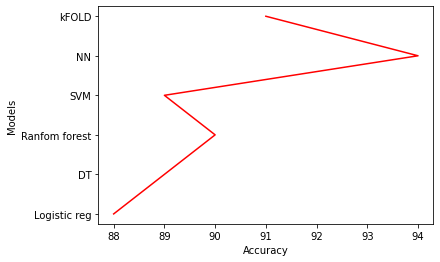

In [219]:
plt.plot(Accuracy,Models,color='red')
plt.xlabel("Accuracy")
plt.ylabel("Models")